# **1) Describe following points and write python programs for data preprocessing**


# **Title of Case Study: Data Analysis of Healthcare data of Appointments**

**Introduction of Topic:**
Data analysis of healthcare appointment data is a vital process that helps healthcare providers and administrators gain valuable insights into patient behavior, appointment scheduling patterns, and resource utilization. By examining factors such as patient demographics, appointment duration, wait times, and no-show rates, healthcare professionals can optimize appointment scheduling, reduce wait times, and improve operational efficiency. Additionally, analyzing healthcare appointment data enables organizations to understand patient behavior and develop targeted interventions to minimize appointment no-shows. By leveraging data-driven insights, healthcare providers can enhance patient care, improve resource allocation, and optimize the overall healthcare experience.

**Technical Description of Dataset as follows with Python Program and Output:**
*  Source URL: https://drive.google.com/file/d/1YtjTAE0eyAf0bYRlYeqIJ-gdTbkHff47/view?usp=sharing
* Data Structures or File Formats
* Features (Variables)
* Quantitative or Qualitative Data
* Info()
* Describe()
* Missing Values, if any.
* Replace missing values, if required.
* Other important measures, if any.

In [134]:
#importing important libraries
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [136]:
#Reading the dataset

base_data = pd.read_csv('Data.csv')

In [137]:
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [138]:
#shape returns number of rows and columns
base_data.shape

(110527, 14)

In [139]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [140]:
#modifying the data and time into standard form
#converting object type into datetime type
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [141]:
base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


for the schedule day and appointment day storing the weekdays only into a variable

In [142]:
# 5 is Saturday, 6 is Sunday
base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek

In [143]:
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [144]:
base_data['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [145]:
base_data['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

In [146]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [147]:
#changing the name of some cloumns
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})


In [148]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [149]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [150]:
# dropping some columns which have no significance
base_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)


In [151]:
base_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1


In [152]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int64         
 12  app_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [153]:
base_data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


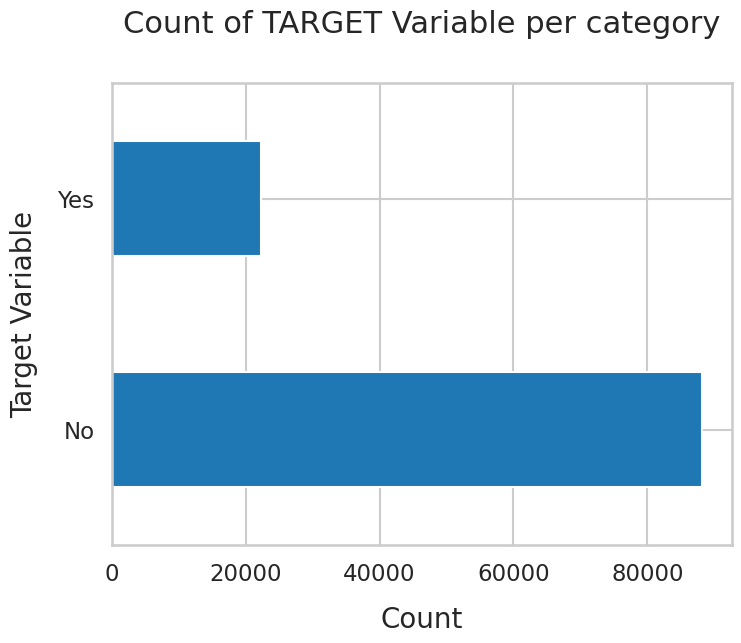

In [154]:
#plotting the target variable

base_data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [155]:
# calculating the % of appointments or not
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

In [156]:
base_data['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [157]:
# Having a look that data contains missing values or not
#missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
#plt.figure(figsize=(16,5))
#ax = sns.pointplot('index',0,data=missing)
#plt.xticks(rotation =90,fontsize =7)
#plt.title("Percentage of Mi ssing values")
#plt.ylabel("PERCENTAGE")
#plt.show()

In [158]:
#calculation missing data
base_data.isnull().sum()/(len(base_data))*100

Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Scholarship       0.0
Hypertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handicap          0.0
SMSReceived       0.0
NoShow            0.0
sch_weekday       0.0
app_weekday       0.0
dtype: float64

# **Missing Data - Initial Intuition**
Here, we don't have any missing data.


# **General Thumb Rules:**
* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

# **Data Cleaning**
1.   Create a copy of base data for manupulation & processing



In [159]:
new_data = base_data.copy()

In [160]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int64         
 12  app_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


**As we don't have any null records, there's no data cleaning required**

In [161]:
# Get the max tenure
print(base_data['Age'].max()) #72

115


In [162]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

In [163]:
base_data.drop(['Age'], axis=1, inplace=True)

# **2) Data Visualization Using Python Visualization Libraries (matplotlib or seaborn)**
* Plot various graphs or charts related to the dataset, dataset variables and relations between
different variables
* Python Program for different plot visualizations
* Plot Analysis of all the plots

In [164]:
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1 

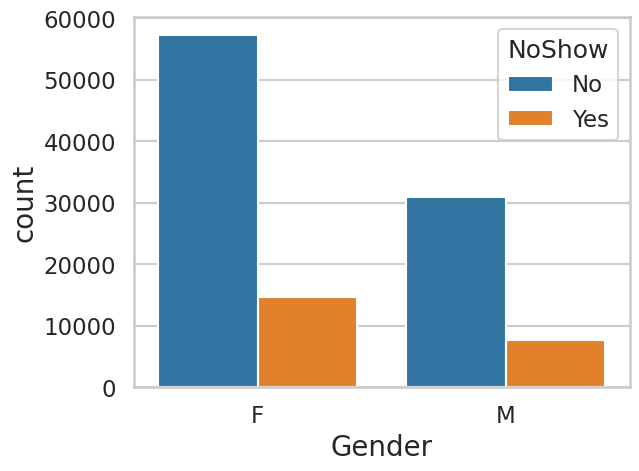

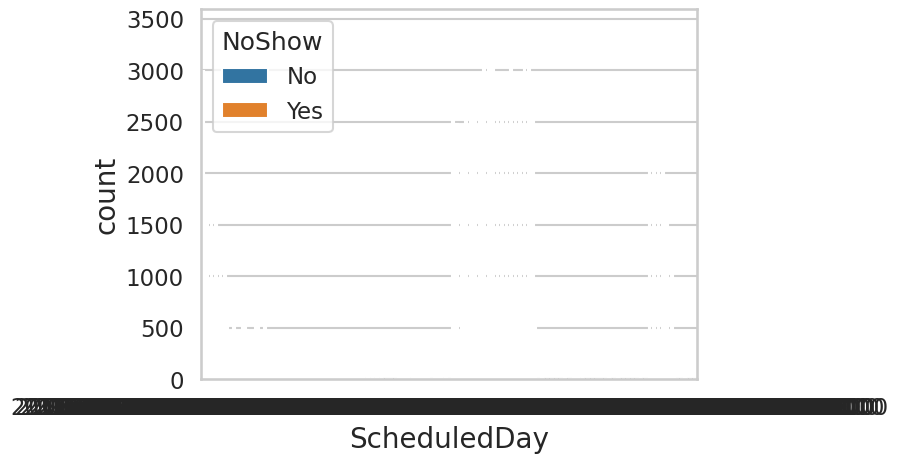

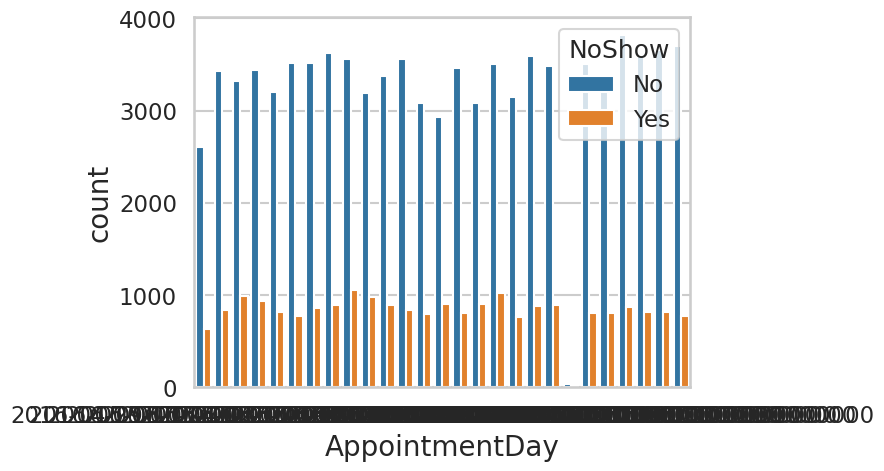

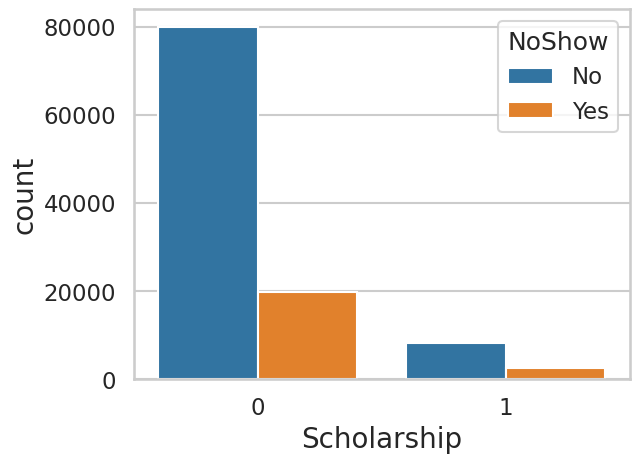

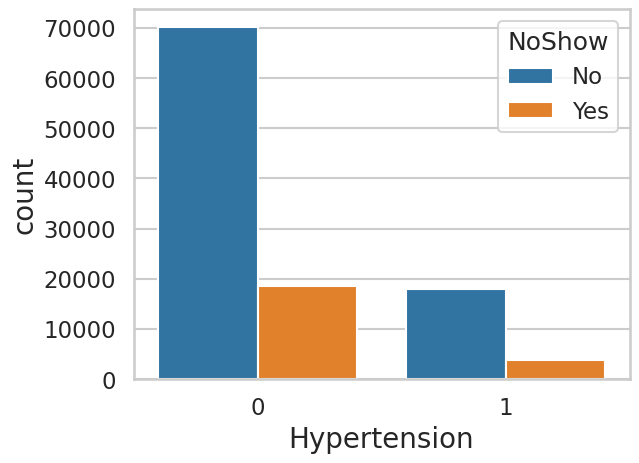

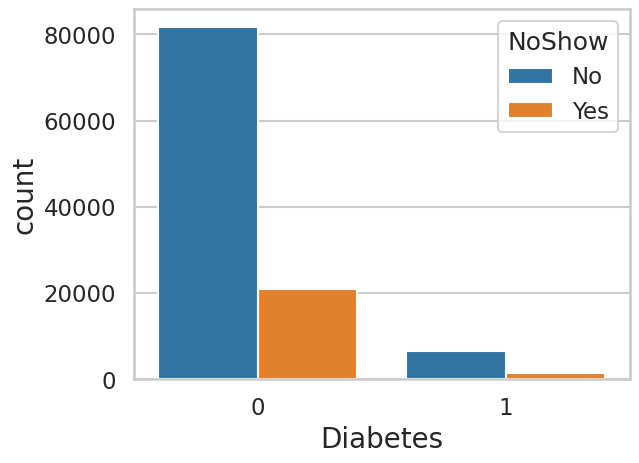

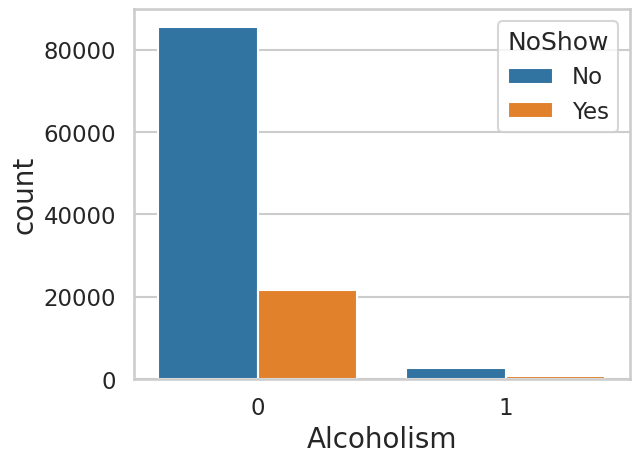

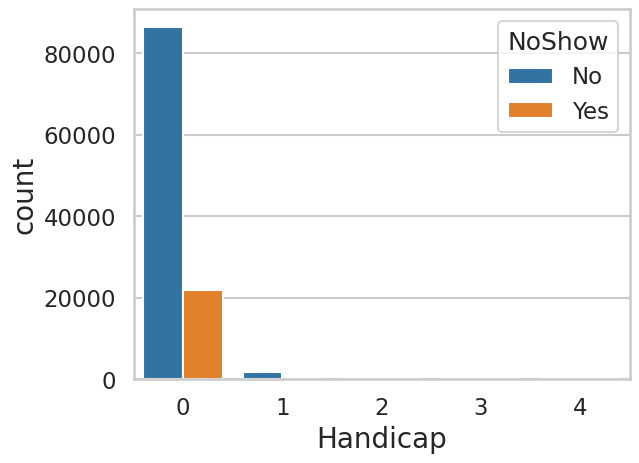

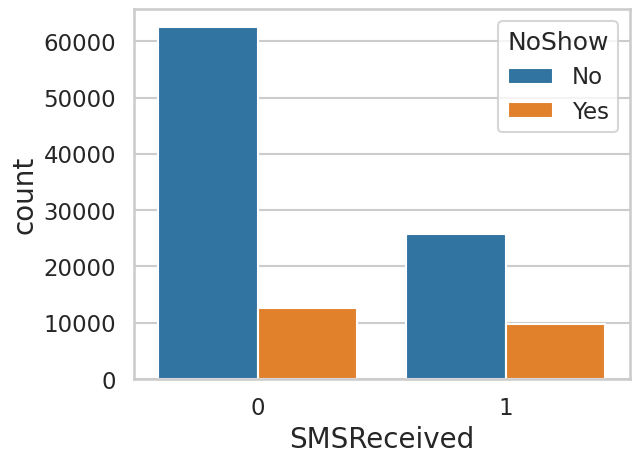

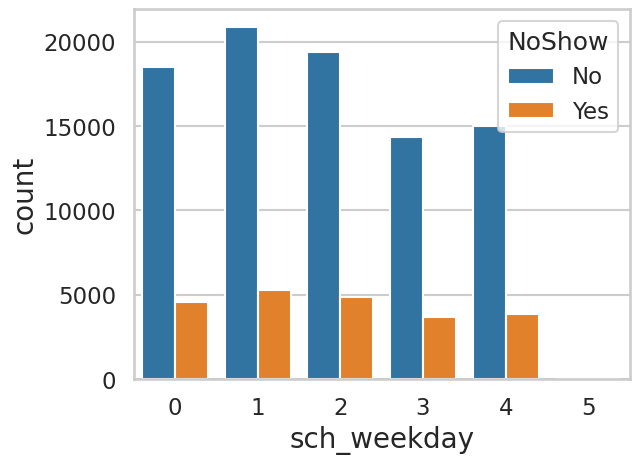

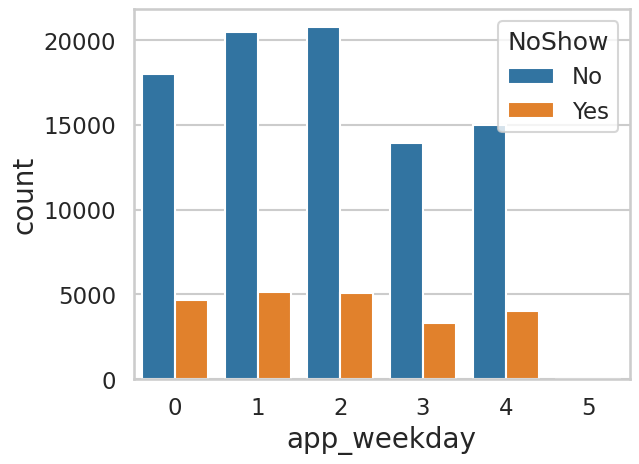

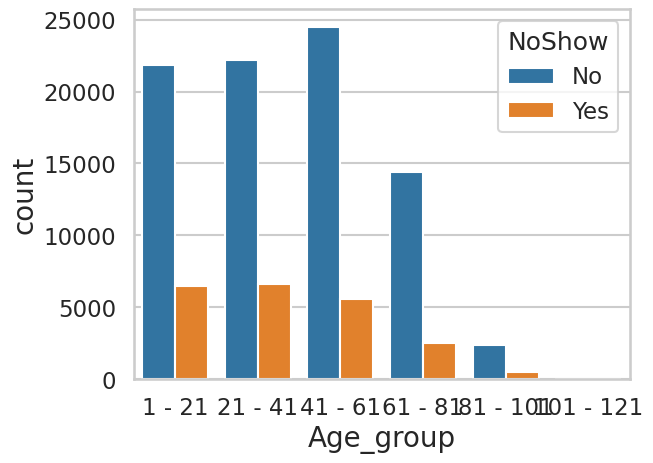

In [165]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(base_data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(base_data[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='NoShow')

In [166]:
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)

In [167]:
base_data.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

**Convert all the categorical variables into dummy variables**

In [168]:
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


**Build a corelation of all predictors with 'NoShow'**

<ipython-input-169-2af5ffecb2b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

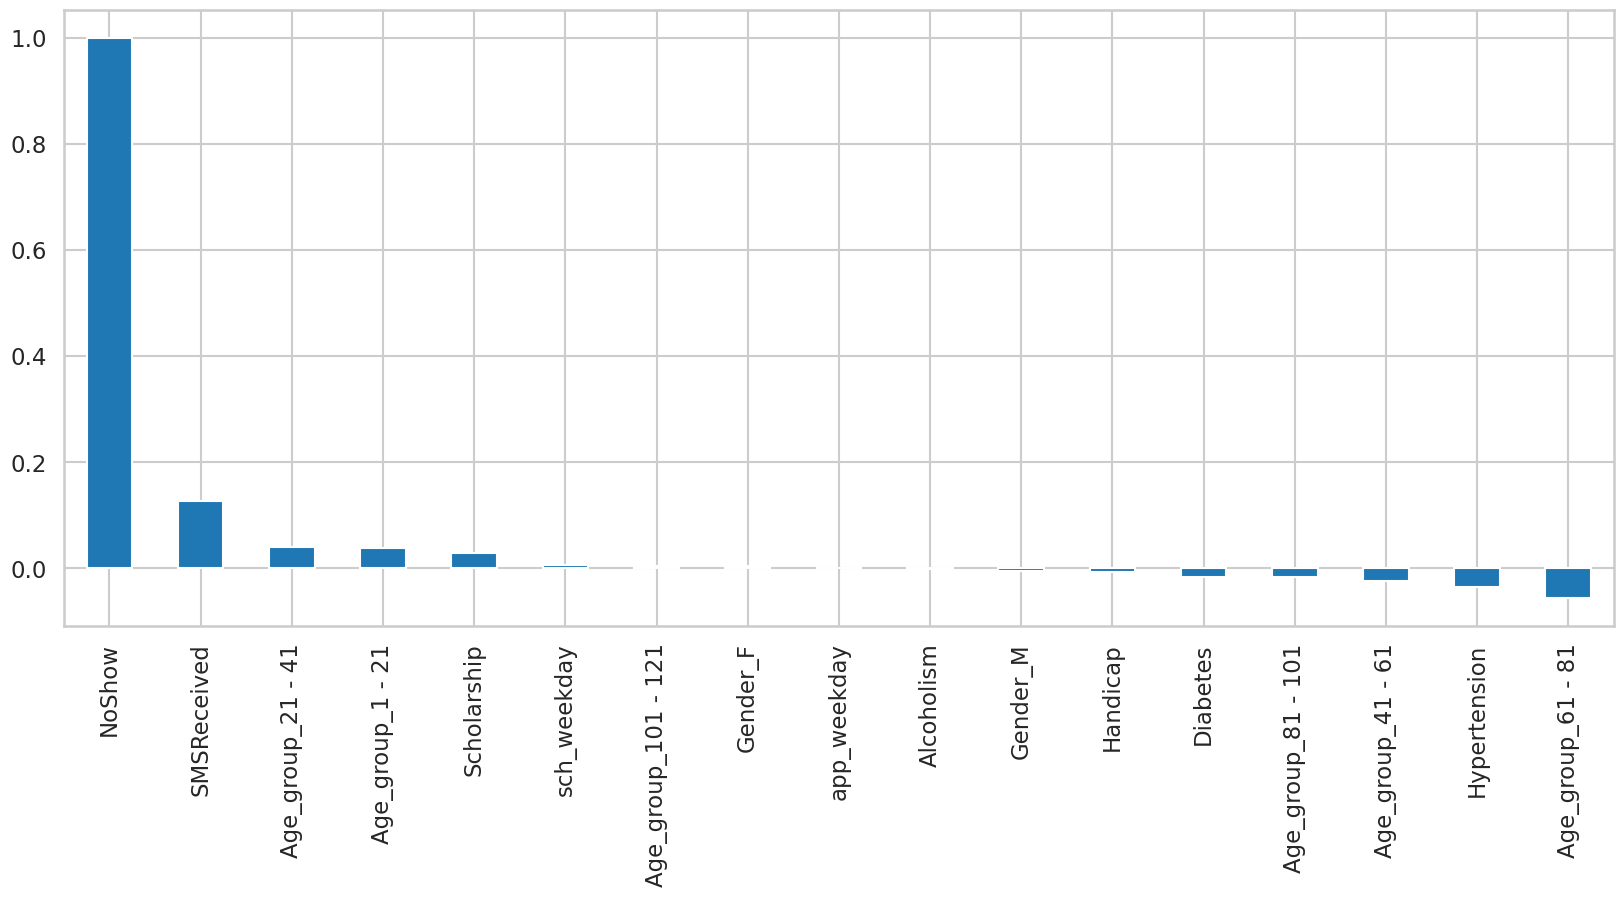

In [169]:
plt.figure(figsize=(20,8))
base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<ipython-input-170-008e55dbac3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base_data_dummies.corr(), cmap="Paired")


<Axes: >

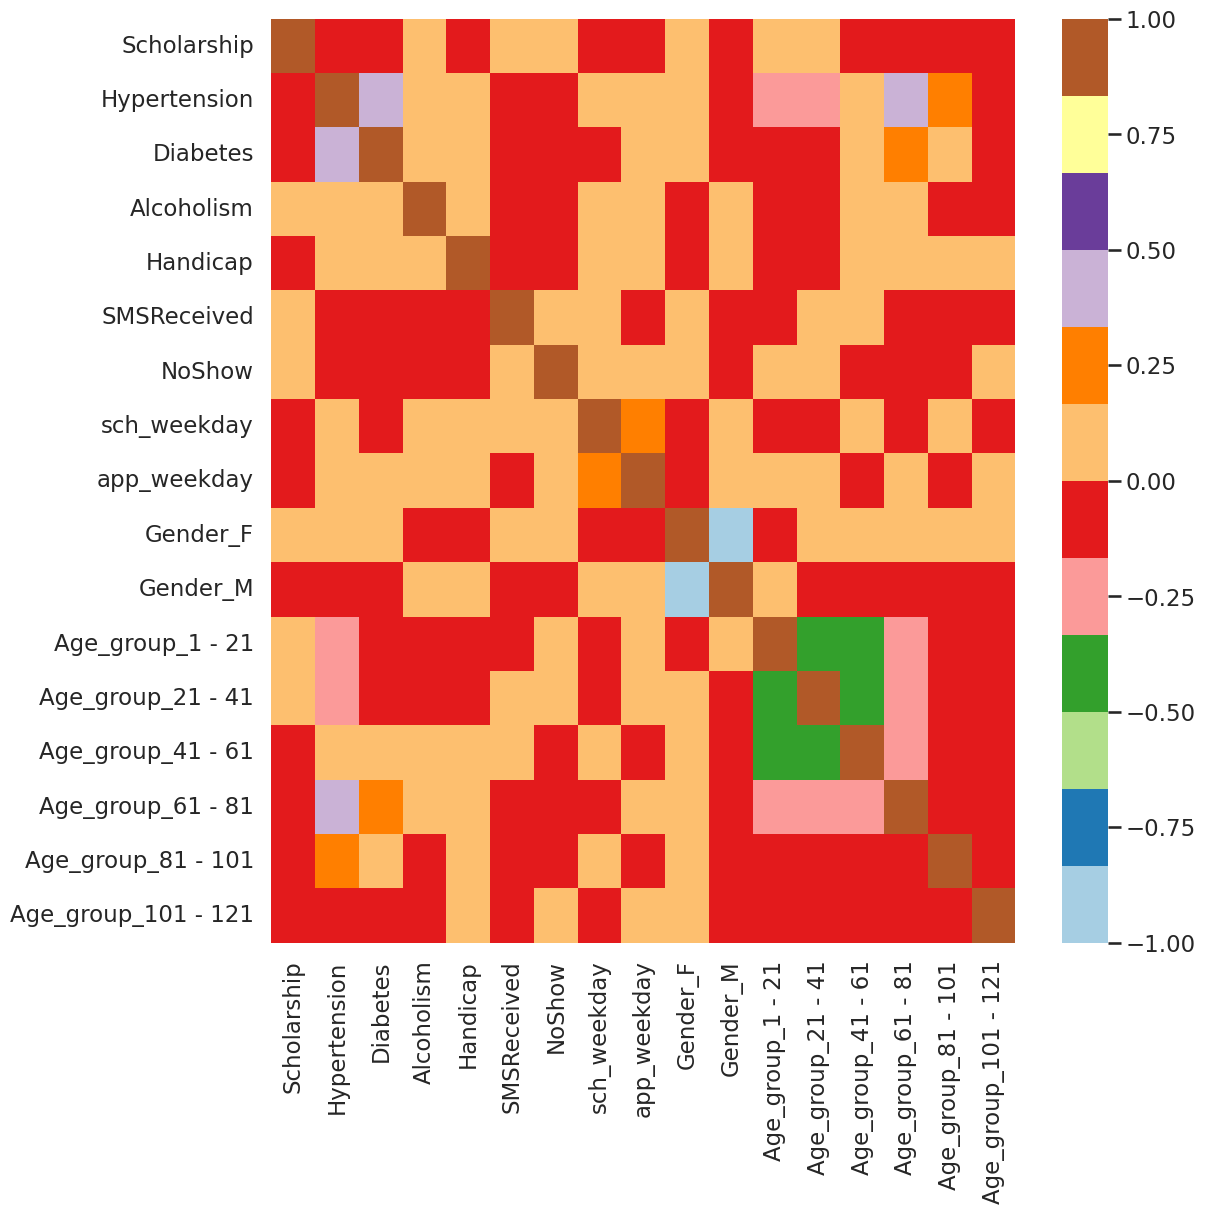

In [170]:
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")

# **Bivariate Analysis**

In [171]:
new_df1_target0=base_data.loc[base_data["NoShow"]==0]
new_df1_target1=base_data.loc[base_data["NoShow"]==1]

In [172]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

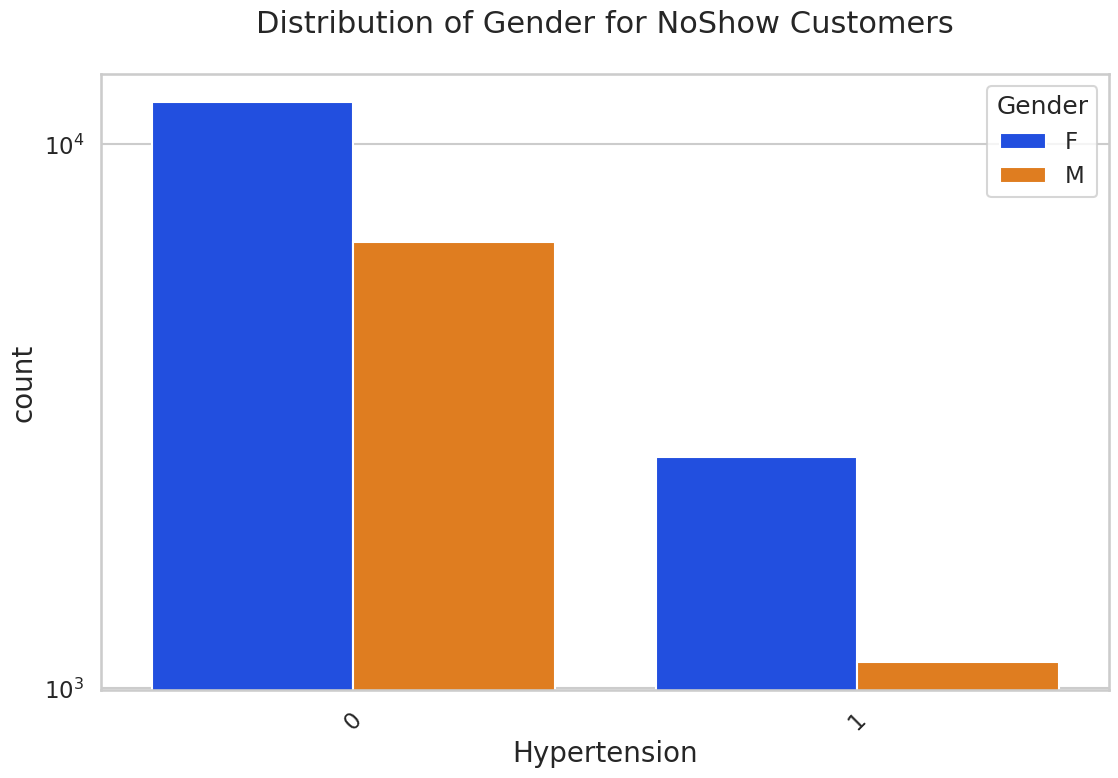

In [173]:

uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

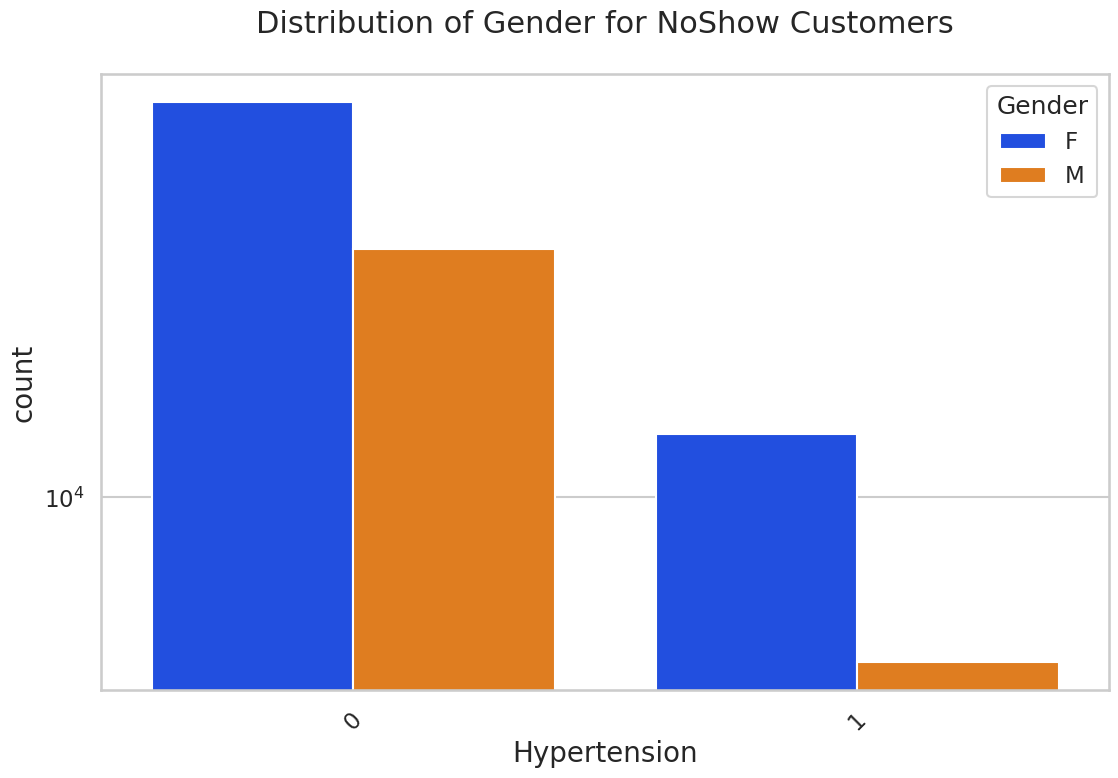

In [174]:

uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

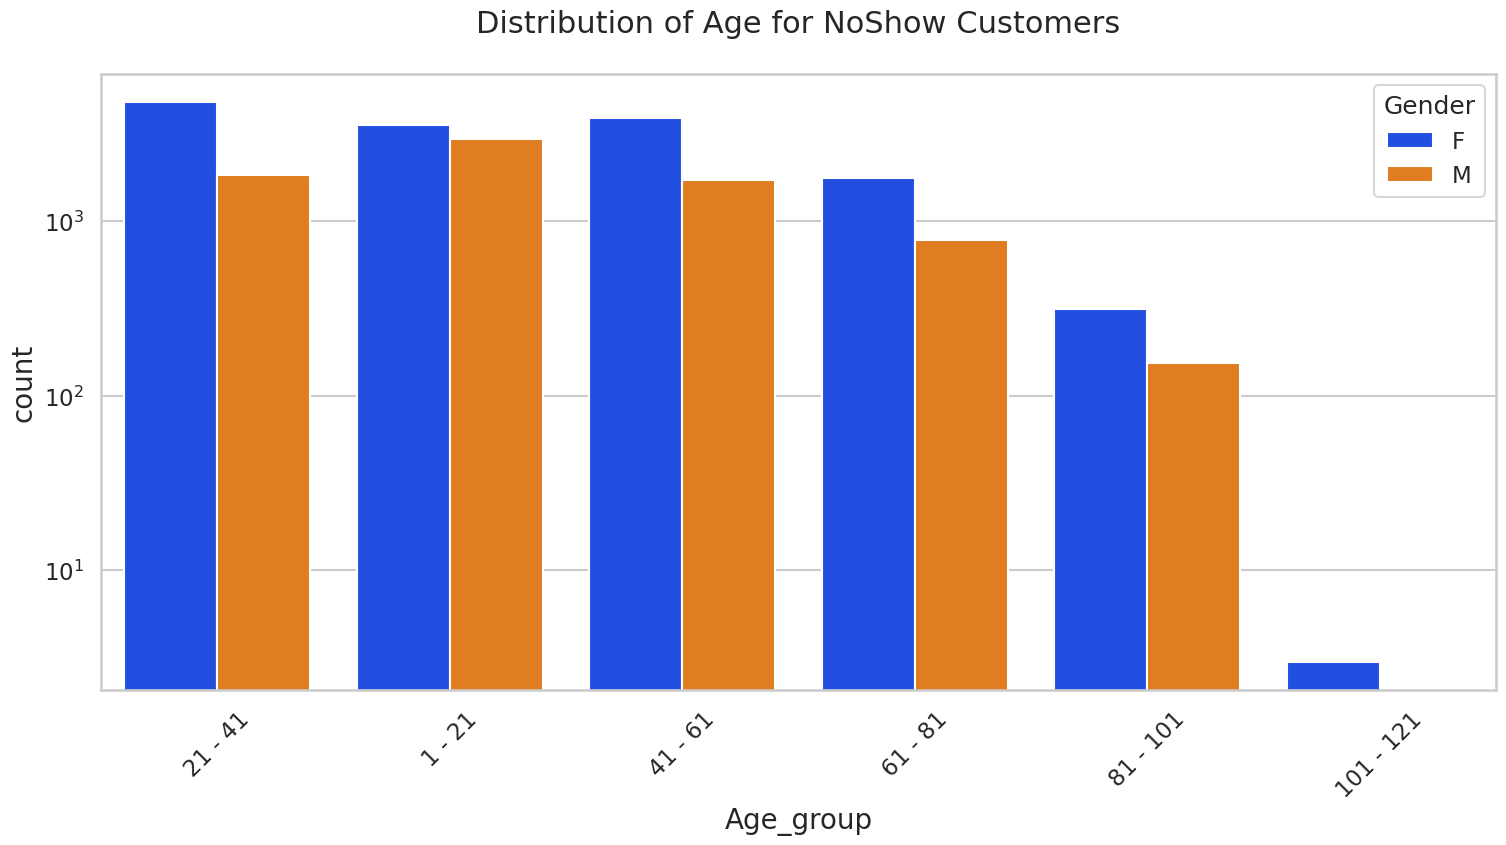

In [175]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

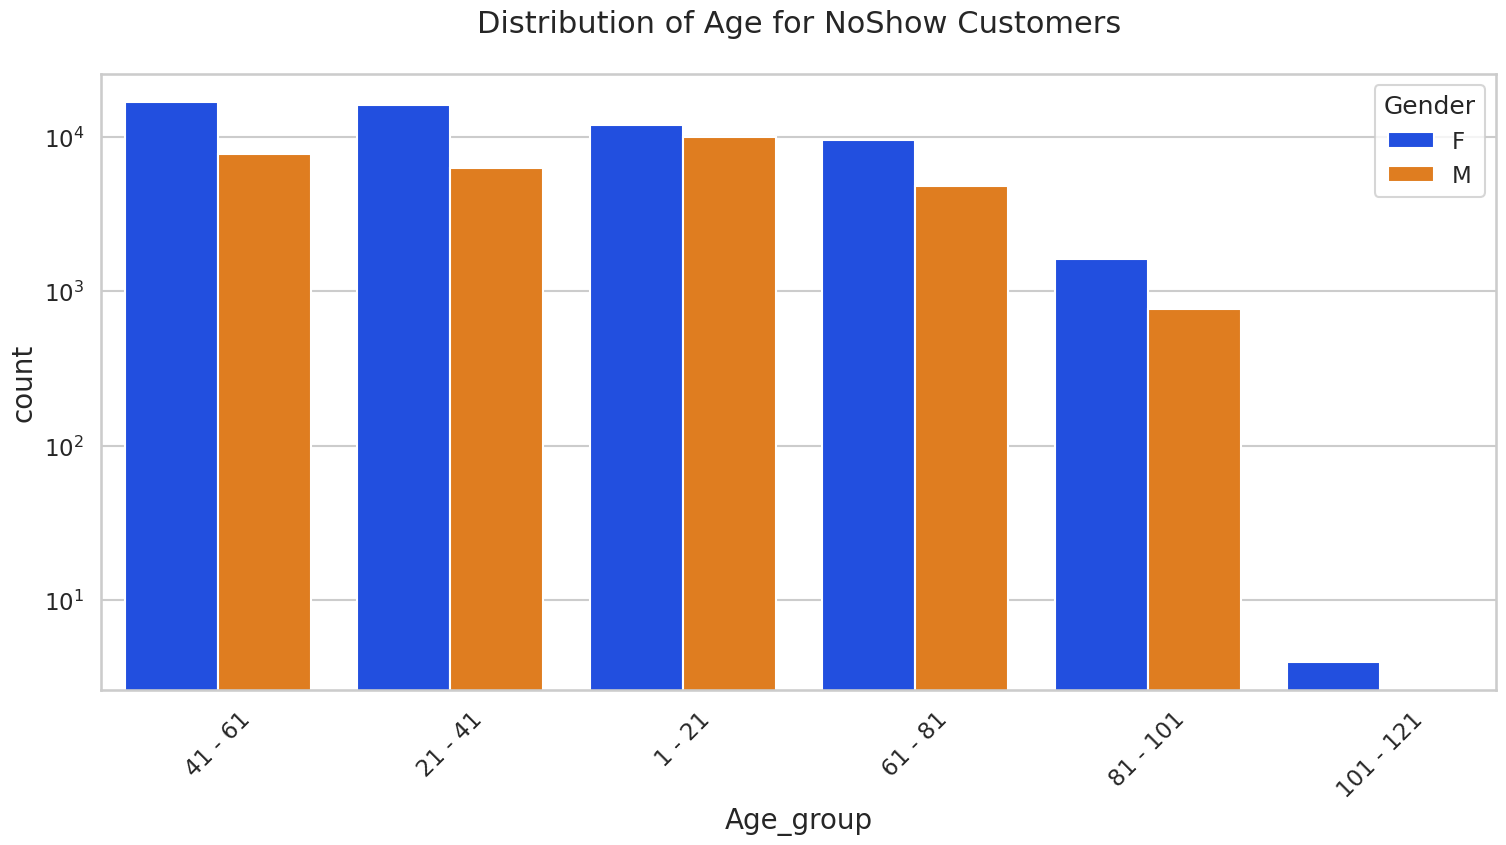

In [176]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

# **3) Data Analysis Using Python Supervised or Unsupervised Machine Learning Algorithms:**

**Write Python Program for -**

* Perform Regression or Classification Modeling using appropriate Machine Learning
Algorithms

* Perform machine learning modeling depending of the dataset for quantitative or qualitative
data and associated relationship among various features (variables) of the dataset.

* Predict Value of the dependent (output) variables for NEW observations of the independent
(input) variables

In [179]:
#cleaning the data and treating nan values
#base_data.drop('NoShow', axis=1, inplace=True)
nan_values = base_data.isna().sum()
print(nan_values)

Gender               0
ScheduledDay         0
AppointmentDay       0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMSReceived          0
NoShow               0
sch_weekday          0
app_weekday          0
Age_group         3540
dtype: int64


In [180]:
clean_data = base_data.dropna()

In [182]:
clean_data = base_data.dropna(axis=1)

In [190]:
#searching for string values as they are not suitable for training the data
string_columns = clean_data.select_dtypes(include='object').columns
print(string_columns)
#ignoring string values
string_values = clean_data[string_columns]

Index([], dtype='object')


In [191]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
clean_data['Gender'] = label_encoder.fit_transform(clean_data['Gender'])


<ipython-input-191-22b0956545cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Gender'] = label_encoder.fit_transform(clean_data['Gender'])


In [194]:
#training the data it except numerical values

X = clean_data.drop('NoShow', axis=1)  # Features (input variables)
y = clean_data['NoShow']  # Target variable (output variable)

columns_to_ignore = ['ScheduledDay', 'AppointmentDay']  # List of columns to ignore
X = X.drop(columns_to_ignore, axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)


        Gender  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
58187        0            0             0         0           0         0   
5095         1            0             0         0           0         0   
67919        0            0             0         0           0         0   
2861         1            0             0         0           0         0   
45949        1            0             1         0           1         0   
...        ...          ...           ...       ...         ...       ...   
76820        0            0             1         1           0         0   
110268       1            0             0         0           0         0   
103694       0            0             0         0           0         0   
860          0            1             0         0           0         0   
15795        1            1             0         0           0         0   

        SMSReceived  sch_weekday  app_weekday  
58187             0        

In [195]:
reg_model = LinearRegression()  # Instantiate the regression model
reg_model.fit(X_train, y_train)  # Train the model using the training data


LinearRegression()

In [196]:
y_pred = reg_model.predict(X_test)


* Evaluate machine learning model using statistical metrics such as R2, RMSE, MAE, Correlation Matrix and Confusion Matrix.

In [197]:
mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.15804969785792677
R-squared Score: 0.014826770995047811


# **Findings**
* Female patients have taken more appointments then male patients
* Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
* Each Neighbourhood have almost 80% show rate
* There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
* There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
* There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
* There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
* There is no appointments on sunday and on saturday appointments are very less in comparision to other week days